In [15]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [9]:
df = pd.read_csv('dataset_politik_combined.csv')
df = df.drop_duplicates()
df = df.dropna()

In [22]:
df.head()

,full_text,processed_text_sastrawi,label
0,marah cawapres mentri yg jd cawapres menkopolh...,marah cawapres tri yg jd cawapres menkopolhukam,1
1,mahfud md resmi diumumkan cawapres ganjaar pra...,mahfud md resmi umum cawapres ganjaar pranowo ...,0
2,anakanak keberadaan cawapres prabowo gibran ra...,anakanak ada cawapres prabowo gibran rakabumin...,1
3,kalo tdk knp gerombolan pecundang spt diam beg...,kalo tdk knp gerombol cundang spt diam bego pu...,1
4,klo kiat rujuk dlu bg sajak jdi cawapres basan...,klo kiat rujuk dlu bg sajak jdi cawapres basan...,1


In [10]:
# Nonaktifkan eager execution untuk meningkatkan performa
tf.compat.v1.disable_eager_execution()

# Load tokenizer dan model BERT versi lebih kecil
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
bert_encoder = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', output_attentions=False, output_hidden_states=False)

def tokenize_sentences(sentences, tokenizer, max_len=64):  # Mengurangi max_len
    input_ids, attention_masks = [], []
    for sentence in sentences:
        bert_inp = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True, truncation=True)
        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])
    return np.array(input_ids, dtype='int32'), np.array(attention_masks, dtype='int32')

sentences = df['processed_text_sastrawi']
labels = df['label']
labels = to_categorical(labels, num_classes=3)

input_ids, attention_masks = tokenize_sentences(sentences, tokenizer)

bert_encoder = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', trainable=False)

def create_model():
    input_ids = tf.keras.layers.Input(shape=(64,), dtype='int32')
    attention_masks = tf.keras.layers.Input(shape=(64,), dtype='int32')

    # Gunakan output embedding dari BERT
    bert_output = bert_encoder(input_ids, attention_mask=attention_masks)[0]

    output = tf.keras.layers.GlobalAveragePooling1D()(bert_output)
    output = tf.keras.layers.Dense(32, activation='relu')(output)
    output = tf.keras.layers.Dropout(0.3)(output)
    output = tf.keras.layers.Dense(3, activation='softmax')(output)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()


model = create_model()

X_train, x_temp, y_train, y_temp = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
attention_masks_train, attention_masks_temp = train_test_split(attention_masks, test_size=0.2, random_state=42)  # Pastikan ini sesuai dengan pembagian X_train dan x_temp

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)
attention_masks_val, attention_masks_test = train_test_split(attention_masks_temp, test_size=1/3, random_state=42)  # Pastikan ini sesuai dengan pembagian x_val dan x_test

history = model.fit([X_train, attention_masks_train], y_train, validation_data=([x_val, attention_masks_val], y_val), epochs=5, batch_size=16)  # Ukuran batch dikurangi

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'tf_bert_model_3/bert/embeddings/assert_less/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\ops\check_ops.py", line 955, in assert_less
    return _binary_assert('<', 'assert_less', math_ops.less, np.less, x, y, data,  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\ops\check_ops.py", line 508, in _binary_assert
    return control_flow_assert.Assert(condition, data, summarize=summarize)  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py", line 1260, in op_dispatch_handler
    return dispatch_target(*args, **kw

Some layers from the model checkpoint at indobenchmark/indobert-base-p1 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
c:\Users\HP\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is 

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'tf_bert_model_4/bert/embeddings/assert_less/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\ops\check_ops.py", line 955, in assert_less
    return _binary_assert('<', 'assert_less', math_ops.less, np.less, x, y, data,  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\ops\check_ops.py", line 508, in _binary_assert
    return control_flow_assert.Assert(condition, data, summarize=summarize)  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py", line 1260, in op_dispatch_handler
    return dispatch_target(*args, **kw

Some layers from the model checkpoint at indobenchmark/indobert-base-p1 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'tf_bert_model_4_1/bert/embeddings/assert_less/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\ops\check_ops.py", line 955, in assert_less
    return _binary_assert('<', 'assert_less', math_ops.less, np.less, x, y, data,  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\ops\check_ops.py", line 508, in _binary_assert
    return control_flow_assert.Assert(condition, data, summarize=summarize)  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)  File "c:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py", line 1260, in op_dispatch_handler
    return dispatch_target(*args, **

c:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


11692/11692 [==============================] - 754s 64ms/sample - loss: 0.7270 - accuracy: 0.6943 - val_loss: 0.6653 - val_accuracy: 0.7084
Epoch 2/5
11692/11692 [==============================] - 715s 61ms/sample - loss: 0.6471 - accuracy: 0.7315 - val_loss: 0.6076 - val_accuracy: 0.7479
Epoch 3/5
11692/11692 [==============================] - 698s 60ms/sample - loss: 0.6149 - accuracy: 0.7456 - val_loss: 0.6040 - val_accuracy: 0.7485
Epoch 4/5
11692/11692 [==============================] - 727s 62ms/sample - loss: 0.5958 - accuracy: 0.7493 - val_loss: 0.6077 - val_accuracy: 0.7521
Epoch 5/5
11692/11692 [==============================] - 683s 58ms/sample - loss: 0.5787 - accuracy: 0.7627 - val_loss: 0.5985 - val_accuracy: 0.7490


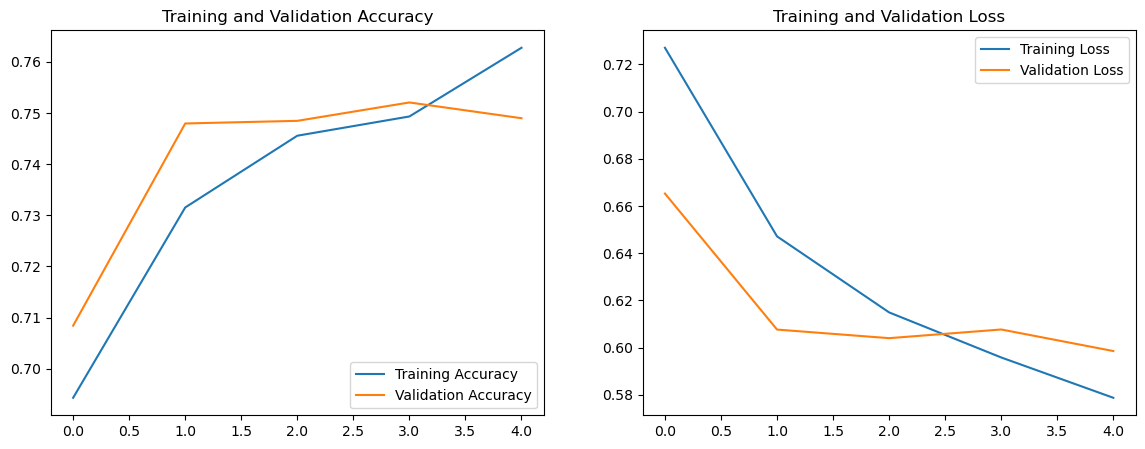

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model.save('modelling7_pretrained.h5')

c:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


c:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



Here is the classification report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.73       282
           1       0.79      0.73      0.76       390
           2       0.72      0.72      0.72       303

    accuracy                           0.74       975
   macro avg       0.73      0.74      0.73       975
weighted avg       0.74      0.74      0.74       975



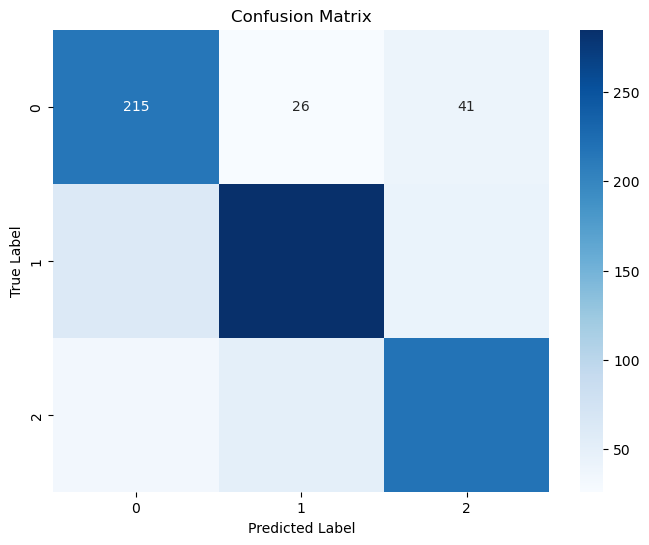

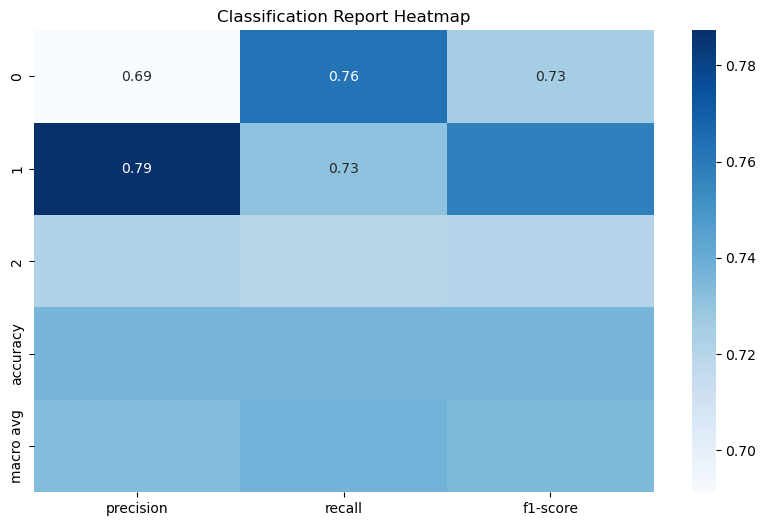

In [20]:
# Make sure that `x_test` and `attention_masks_test` have the same number of samples
assert x_test.shape[0] == attention_masks_test.shape[0]

# Get predictions from the model
predictions = model.predict([x_test, attention_masks_test])

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded y_test to class labels for comparison
true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
class_report = classification_report(true_classes, predicted_classes, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
print("\nHere is the classification report:") 
print(classification_report(true_classes, predicted_classes))

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()
